In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error 
from sklearn.tree import _tree
import numpy as np


def get_rules(tree, feature_names, class_names):
  
    try:
        tree_ = tree.tree_
        feature_name = [
            feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
            for i in tree_.feature
        ]

        paths = []
        path = []

        def recurse(node, path, paths):
            if tree_.feature[node] != _tree.TREE_UNDEFINED:
                name = feature_name[node]
                threshold = tree_.threshold[node]
                p1, p2 = list(path), list(path)
                p1 += [f"({name} <= {np.round(threshold, 3)})"]
                recurse(tree_.children_left[node], p1, paths)
                p2 += [f"({name} > {np.round(threshold, 3)})"]
                recurse(tree_.children_right[node], p2, paths)
            else:
                path += [(tree_.value[node], tree_.n_node_samples[node])]
                paths += [path]

        recurse(0, path, paths)

        
        samples_count = [p[-1][1] for p in paths]
        ii = list(np.argsort(samples_count))
        paths = [paths[i] for i in reversed(ii)]

        rules = []
        for path in paths:
            rule = "if "

            for p in path[:-1]:
                if rule != "if ":
                    rule += " and "
                rule += str(p)
            # rule += " then "
            if class_names is None:
                rule += "then response: " + str(np.round(path[-1][0][0][0], 3))
            else:
                classes = path[-1][0][0]
                l = np.argmax(classes)
                rule += f"class: {class_names[l]} (proba: {np.round(100.0 * classes[l] / np.sum(classes), 2)}%)"
            rule += f" | based on {path[-1][1]:,} samples"
            rules += [rule]

        return rules
    except (AttributeError, NameError) as e:
        print(f"Error extracting rules: {e}")
        return None


def get_all_rules(forest, feature_names, class_names):
    """
    Extracts rules from all trees in a Random Forest.

    Args:
        forest: The Random Forest model.
        feature_names: List of feature names.
        class_names: List of class names (if applicable).

    Returns:
        A list of lists, where each inner list contains rules extracted from a single tree.
    """
    all_rules = []
    for tree in forest.estimators_:
        rules = get_rules(tree, feature_names, class_names)
        
        if rules:
           
            all_rules.append(rules)
            
    return all_rules



data = pd.read_csv(r"C:\Users\ASUS\OneDrive\Desktop\mlp\pickle\fastnfastp_3.3V_-15.csv")


X = data[['vdd','pd','vinp','temperature']] 
y = data["vinn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, max_depth=4)  

model.fit(X_train, y_train)


predictions = model.predict(X_test)


mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

print("Predictions:", predictions)




feature_names = list(X.columns) 
all_rules = get_all_rules(model, feature_names, None)  


for i, tree_rules in enumerate(all_rules):
    print(f"\nRules from Tree {i+1}")
    for rule in tree_rules:
        print(rule)



with open(R"C:\Users\ASUS\OneDrive\Desktop\outs.txt", 'w') as file:
   
    for i, tree_rules in enumerate(all_rules):
      
        file.write(f"\nRules from Tree {i+1} \n")

        
        for rule in tree_rules:
            file.write(rule + "\n")

print("Output has been written to the file.")


Mean Squared Error: 0.00964070301391958
Predictions: [1.64070507 1.64070507 1.25484878 ... 1.64428312 1.25484878 1.54172892]

Rules from Tree 1
if (vinp > 1.264) and (vinp > 1.586) and (pd <= 1.023) and (vinp <= 1.78): return 1.646
if (vinp > 1.264) and (vinp > 1.586) and (pd <= 1.023) and (vinp > 1.78): return 1.928
if (vinp <= 1.264) and (pd <= 0.002) and (vinp <= 0.866) and (vinp <= 0.751): return 0.162
if (vinp > 1.264) and (vinp <= 1.586) and (pd <= 1.65) and (vinp <= 1.403): return 1.323
if (vinp <= 1.264) and (pd > 0.002) and (vdd > 2.65) and (vdd > 3.02): return 0.083
if (vinp > 1.264) and (vinp <= 1.586) and (pd <= 1.65) and (vinp > 1.403): return 1.486
if (vinp > 1.264) and (vinp > 1.586) and (pd > 1.023) and (pd > 1.303): return 1.254
if (vinp <= 1.264) and (pd > 0.002) and (vdd <= 2.65) and (pd > 0.591): return 0.051
if (vinp > 1.264) and (vinp <= 1.586) and (pd > 1.65) and (vinp <= 1.41): return 1.244
if (vinp > 1.264) and (vinp <= 1.586) and (pd > 1.65) and (vinp > 1.41):

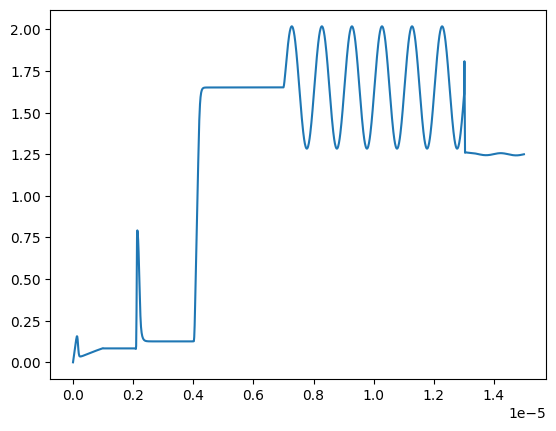

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv(r'C:\Users\ASUS\OneDrive\Desktop\mlp\pickle\fastnfastp_3.3V_-15.csv')
time = data['time']
vinn = data['vinn']

plt.plot(time, vinn, label='Waveform')

## Verilog 

In [3]:
module decision_tree_rule_1 (
    input wire [15:0] vinp,
    input wire [15:0] vdd,
    input wire [15:0] pd,
    output reg [15:0] prediction
);

always @* begin
    if ((vinp > 16'd1264) && (vinp > 16'd1604) && (pd <= 16'd1007) && (vinp <= 16'd1783)) begin
        prediction = 16'd1647;
    end
    else if ((vinp > 16'd1264) && (vinp > 16'd1604) && (pd <= 16'd1007) && (vinp > 16'd1783)) begin
        prediction = 16'd1933;
    end
    else if ((vinp <= 16'd1264) && (pd <= 16'd3) && (vinp <= 16'd808) && (vdd > 16'd1650)) begin
        prediction = 16'd163;
    end
    else if ((vinp > 16'd1264) && (vinp <= 16'd1604) && (pd <= 16'd1650) && (vinp <= 16'd1420)) begin
        prediction = 16'd1331;
    end
    else if ((vinp <= 16'd1264) && (pd > 16'd3) && (vdd > 16'd2610) && (vdd > 16'd3008)) begin
        prediction = 16'd83;
    end
    else if ((vinp > 16'd1264) && (vinp <= 16'd1604) && (pd <= 16'd1650) && (vinp > 16'd1420)) begin
        prediction = 16'd1505;
    end
    else if ((vinp > 16'd1264) && (vinp > 16'd1604) && (pd > 16'd1007) && (pd > 16'd1237)) begin
        prediction = 16'd1254;
    end
    else if ((vinp <= 16'd1264) && (pd > 16'd3) && (vdd <= 16'd2610) && (pd > 16'd587)) begin
        prediction = 16'd51;
    end
    else if ((vinp > 16'd1264) && (vinp <= 16'd1604) && (pd > 16'd1650) && (vinp <= 16'd1433)) begin
        prediction = 16'd1244;
    end
    else if ((vinp > 16'd1264) && (vinp <= 16'd1604) && (pd > 16'd1650) && (vinp > 16'd1433)) begin
        prediction = 16'd1247;
    end
    else if ((vinp <= 16'd1264) && (pd > 16'd3) && (vdd <= 16'd2610) && (pd <= 16'd587)) begin
        prediction = 16'd96;
    end
    else if ((vinp <= 16'd1264) && (pd > 16'd3) && (vdd > 16'd2610) && (vdd <= 16'd3008)) begin
        prediction = 16'd75;
    end
    else if ((vinp <= 16'd1264) && (pd <= 16'd3) && (vinp > 16'd808) && (vinp > 16'd1031)) begin
        prediction = 16'd425;
    end
    else if ((vinp <= 16'd1264) && (pd <= 16'd3) && (vinp > 16'd808) && (vinp <= 16'd1031)) begin
        prediction = 16'd296;
    end
    else if ((vinp > 16'd1264) && (vinp > 16'd1604) && (pd > 16'd1007) && (pd <= 16'd1237)) begin
        prediction = 16'd1365;
    end
    else if ((vinp <= 16'd1264) && (pd <= 16'd3) && (vinp <= 16'd808) && (vdd <= 16'd1650)) begin
        prediction = 16'd0;
    end
    else begin
        prediction = 16'd0; 
    end
end

endmodule


module decision_tree_rule_tb;

    reg [15:0] vinp;
    reg [15:0] pd;
    reg [15:0] vdd;
    wire [15:0] prediction;

    // Instantiate the decision_tree_rule_1 module
    decision_tree_rule_1 uut (
        .vinp(vinp),
        .pd(pd),
        .vdd(vdd),
        .prediction(prediction)
    );

    // Initial block to set inputs and print output
    initial begin
        vinp = 16'd1500;
        pd = 16'd1000;
        vdd = 16'd2000;

        #1; // Wait for one simulation time unit

        $display("For vinp=%0d, vdd=%0d, pd=%0d, the prediction is %0d", vinp, vdd, pd, prediction);
        $finish; // Finish the simulation
    end

endmodule

SyntaxError: unterminated string literal (detected at line 10) (3518834536.py, line 10)